In [2]:
# scikit learn used version 0.23.2.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [3]:
# loading various packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [4]:
# loading the dataset
df = pd.read_csv('/content/datasets_228_482_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Shape of Data is ==> ",df.shape)

Shape of Data is ==>  (768, 9)


In [7]:
# checking for null values
print("Checking if any null values present in the data")
df.isnull().sum()

Checking if any null values present in the data


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

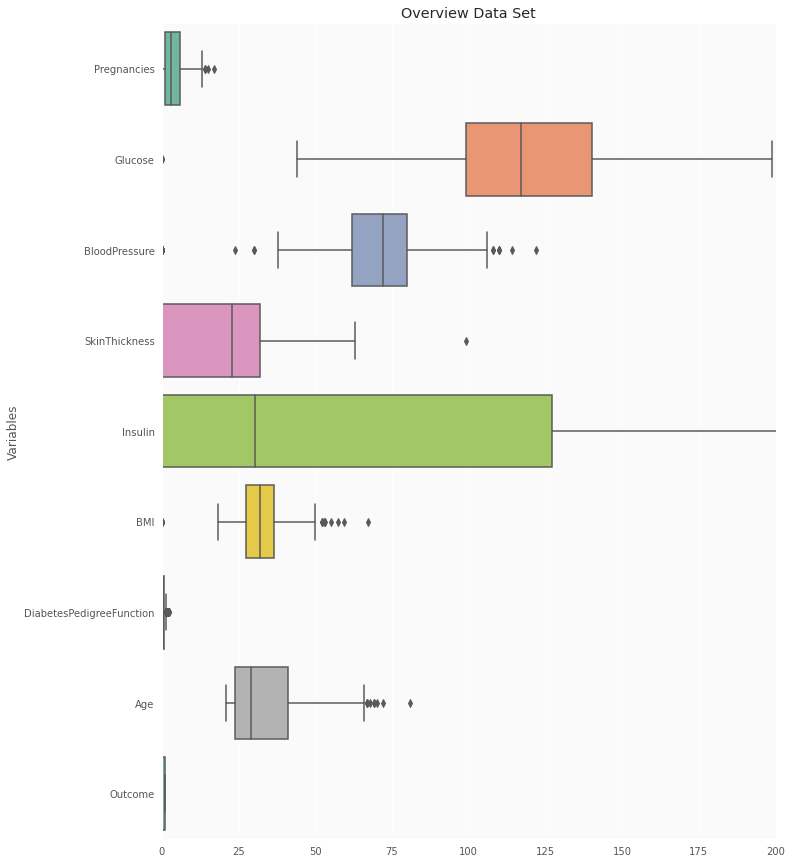

In [8]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, orient = 'h', palette = 'Set2')

Here we can clearly see that there are several outliers present in the dataset such as blood pressure is 0 ,glucose level is 0,pregnancies are 17.
These are mainly due to the error in data collection process done so we need to replace these data points to get a better final result.

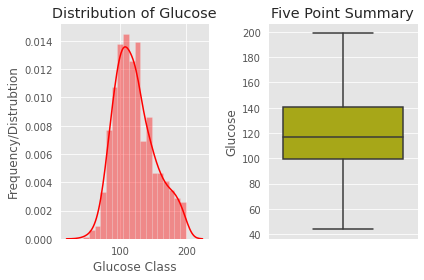

In [9]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
fig,axes = plt.subplots(nrows=1,ncols=2)

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose')
axes[0].set_xlabel('Glucose Class')
axes[0].set_ylabel('Frequency/Distrubtion')
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary')
plt.tight_layout()

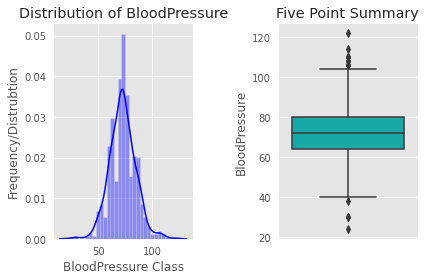

In [10]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
fig,axes = plt.subplots(nrows=1,ncols=2)

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',)
axes[0].set_xlabel('BloodPressure Class',)
axes[0].set_ylabel('Frequency/Distrubtion',)
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',)
plt.tight_layout()

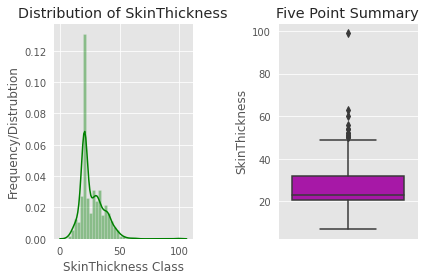

In [11]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
fig,axes = plt.subplots(nrows=1,ncols=2)

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness')
axes[0].set_xlabel('SkinThickness Class')
axes[0].set_ylabel('Frequency/Distrubtion')
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary')
plt.tight_layout()

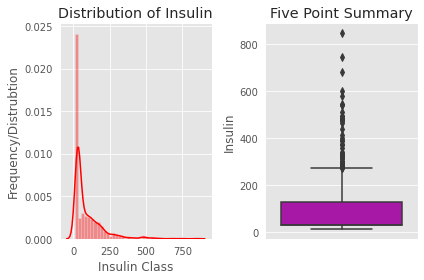

In [12]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
fig,axes = plt.subplots(nrows=1,ncols=2)

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin')
axes[0].set_xlabel('Insulin Class')
axes[0].set_ylabel('Frequency/Distrubtion')
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary')
plt.tight_layout()

In [13]:
df.BMI = df.BMI.replace(0,df.BMI.mean())

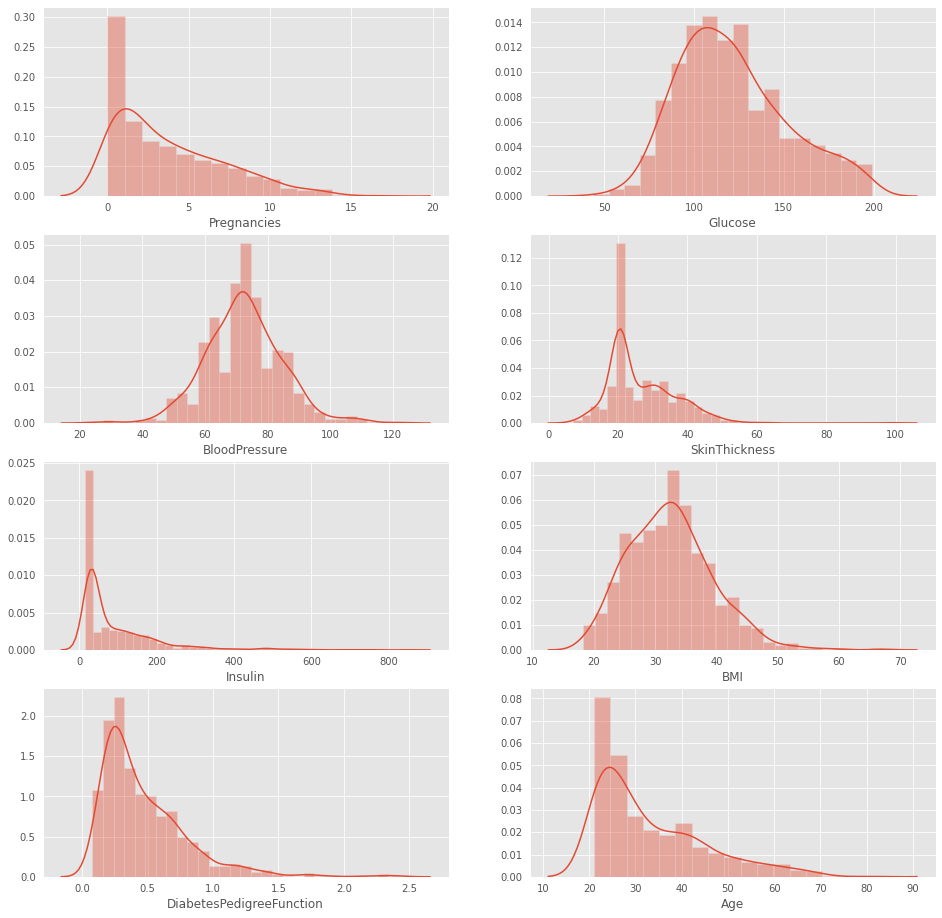

In [14]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])

In [15]:
# the class wise distribution of the data 
print('The distribution of the classes in the data::')
print(df.Outcome.value_counts())

The distribution of the classes in the data::
0    500
1    268
Name: Outcome, dtype: int64


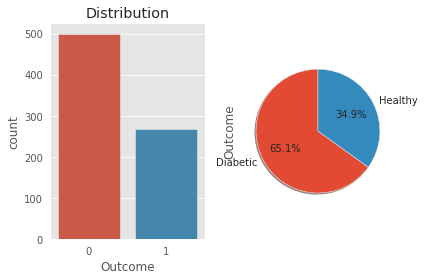

In [16]:
fig1, ax1 = plt.subplots(1,2)
sns.countplot(df['Outcome'],ax=ax1[0]).set_title("Distribution")
labels = 'Diabetic', 'Healthy'

df.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.tight_layout()

In [17]:
df.var()

Pregnancies                    11.354056
Glucose                       926.351048
BloodPressure                 146.328741
SkinThickness                  92.760798
Insulin                     11140.295536
BMI                            47.270761
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

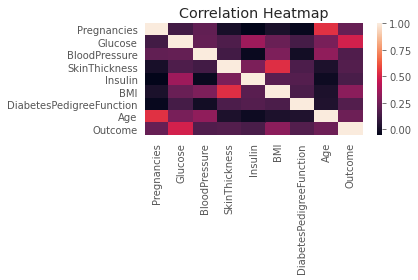

In [18]:
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns).set_title("Correlation Heatmap")
plt.tight_layout()

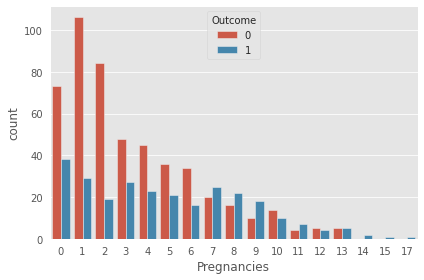

In [19]:
# chances of being diabetic as a result of being number of children
sns.countplot(x='Pregnancies',hue='Outcome',data=df)
plt.tight_layout()

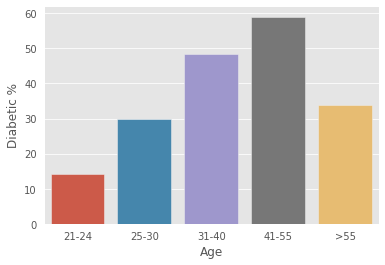

In [20]:
# viewing the age wise chances of being diabetic
age=df.Age
a=pd.Series([])
for i in df.index:
    if(df.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(df.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(df.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(df.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
data=df
data['Age']=a
#Find the number of diabetic person in each age group
data1=df[df['Outcome']==1].groupby('Age')[['Outcome']].count()
data2=df.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
sns.barplot(data1.index,data1['Diabetic %'])

In [21]:
df.Age=age
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

(614, 8)
(154, 8)
(614,)
(154,)


KNN

In [22]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15,25,30,50]}
grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [23]:
grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

Best Score ==>  0.7542305658381808
Tuned Paramerers ==>  {'n_neighbors': 15}
Accuracy on Train set ==>  0.7915309446254072
Accuracy on Test set ==>  0.8246753246753247


In [24]:
y_pred=grid_knn.predict(x_test_std)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)

In [25]:
print("auc",roc_auc_score(y_test, y_pred))
print("test accuracy ", accuracy)
print("Precision ",precision)
print("Recall ",recall)
print("F1 Score ",2*((precision*recall)/(precision+recall)))
f1_knn=2*((precision*recall)/(precision+recall))

auc 0.7783853648836746
test accuracy  0.8246753246753247
Precision  0.7380952380952381
Recall  0.6595744680851063
F1 Score  0.6966292134831461


In [26]:
filename = 'knn_model.sav'
pickle.dump(grid_knn, open('knn.pkl', 'wb'))

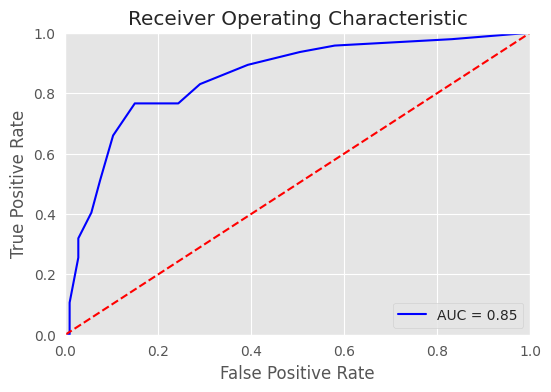

In [27]:
probs = grid_knn.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression

In [28]:
logreg = LogisticRegression().fit(x_train_std, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(x_train_std, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(x_test_std, y_test)))


y_pred=logreg.predict(x_test_std)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)

print("train accuracy",logreg.score(x_train_std,y_train))

print("auc",roc_auc_score(y_test, y_pred))
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("test accuracy ", accuracy)
print("Precision ",precision)
print("Recall ",recall)
print("F1 Score ",2*((precision*recall)/(precision+recall)))
f1_logreg=2*((precision*recall)/(precision+recall))
cv_results=cross_val_score(logreg,x_train_std,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))

filename = 'logistic_Regression_model.sav'
pickle.dump(logreg, open('logreg.pkl', 'wb'))


Training set accuracy: 0.770
Test set accuracy: 0.818
train accuracy 0.7703583061889251
auc 0.7558162656591767
test accuracy  0.8181818181818182
Precision  0.7567567567567568
Recall  0.5957446808510638
F1 Score  0.6666666666666666
[0.73170732 0.82113821 0.75609756 0.72357724 0.77868852]
0.7622417699586832


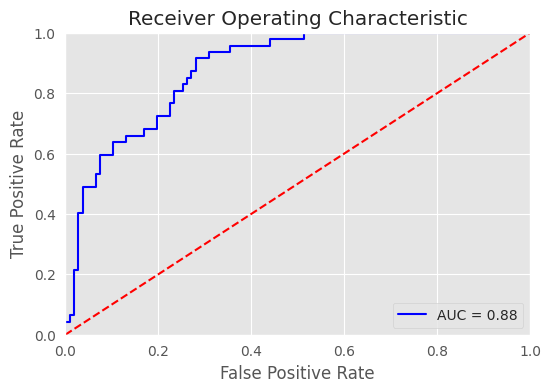

In [28]:
probs = logreg.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree

In [29]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train_std, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test_std, y_test)))

y_pred=tree.predict(x_test_std)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)

print("train accuracy",logreg.score(x_train_std,y_train))

print("auc",roc_auc_score(y_test, y_pred))
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("test accuracy ", accuracy)
print("Precision ",precision)
print("Recall ",recall)
print("F1 Score ",2*((precision*recall)/(precision+recall)))
f1_decision_tree=2*((precision*recall)/(precision+recall))
cv_results=cross_val_score(tree,x_train_std,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))

filename = 'Decision_Tree_model.sav'
pickle.dump(tree, open('tree.pkl', 'wb'))

Accuracy on training set: 0.764
Accuracy on test set: 0.760
train accuracy 0.7703583061889251
auc 0.6898985881885066
test accuracy  0.7597402597402597
Precision  0.631578947368421
Recall  0.5106382978723404
F1 Score  0.5647058823529411
[0.65853659 0.74796748 0.68292683 0.69105691 0.74590164]
0.7052778888444622


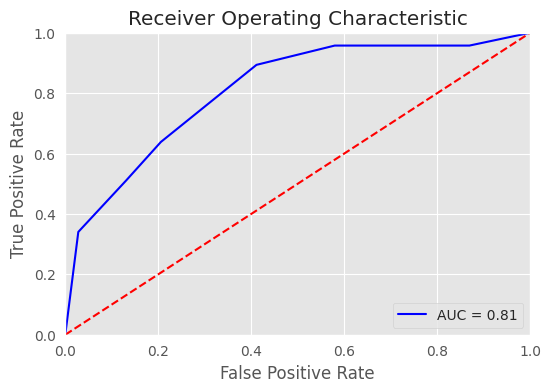

In [30]:
probs = tree.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost

In [31]:
xgbcl = xgb.XGBClassifier()
param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}
grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)
grid_xgb.fit(x_train_std,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(x_test_std,y_test))

Best Score ==>  0.7507667900581703
Tuned Paramerers ==>  {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'booster': 'gbtree'}
Accuracy on Train set ==>  0.8680781758957655
Accuracy on Test set ==>  0.8311688311688312


In [32]:
y_pred=grid_xgb.predict(x_test_std)

print("train accuracy",grid_xgb.score(x_train_std,y_train))

print("auc",roc_auc_score(y_test, y_pred))
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("test accuracy ", accuracy)
print("Precision ",precision)
print("Recall ",recall)
print("F1 Score ",2*((precision*recall)/(precision+recall)))

cv_results=cross_val_score(grid_xgb,x_train_std,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))

filename = 'XGB_model.sav'
pickle.dump(grid_xgb, open('xgb.pkl', 'wb'))

train accuracy 0.8680781758957655
auc 0.7890236627560152
test accuracy  0.7597402597402597
Precision  0.631578947368421
Recall  0.5106382978723404
F1 Score  0.5647058823529411
[0.69105691 0.82926829 0.79674797 0.69918699 0.71311475]
0.7458749833399974


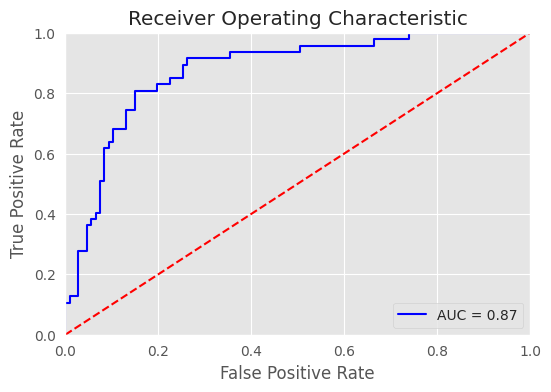

In [33]:
probs = grid_xgb.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVC

In [29]:
svc = SVC(probability=True)
param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}
grid_svc = GridSearchCV(svc,param_grid,scoring='accuracy',cv = 10,refit = True)
grid_svc.fit(x_train_std,y_train)

print("Best Score ==> ", grid_svc.best_score_)
print("Tuned Paramerers ==> ",grid_svc.best_params_)
print("Accuracy on Train set ==> ", grid_svc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_svc.score(x_test_std,y_test))

Best Score ==>  0.7588313061872025
Tuned Paramerers ==>  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy on Train set ==>  0.757328990228013
Accuracy on Test set ==>  0.8051948051948052


In [30]:
y_pred=grid_svc.predict(x_test_std)

print("train accuracy",grid_svc.score(x_train_std,y_train))
print("auc",roc_auc_score(y_test, y_pred))

precision=tp/(tp+fp)
recall=tp/(tp+fn)

print("test accuracy ", accuracy)
print("Precision ",precision)
print("Recall ",recall)
print("F1 Score ",2*((precision*recall)/(precision+recall)))

cv_results=cross_val_score(grid_svc,x_train_std,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))

filename = 'SVC.sav'
pickle.dump(grid_svc, open('svc.pkl', 'wb'))

train accuracy 0.757328990228013
auc 0.7405050705905747
test accuracy  0.8181818181818182
Precision  0.7567567567567568
Recall  0.5957446808510638
F1 Score  0.6666666666666666
[0.72357724 0.79674797 0.74796748 0.70731707 0.77868852]
0.750859656137545


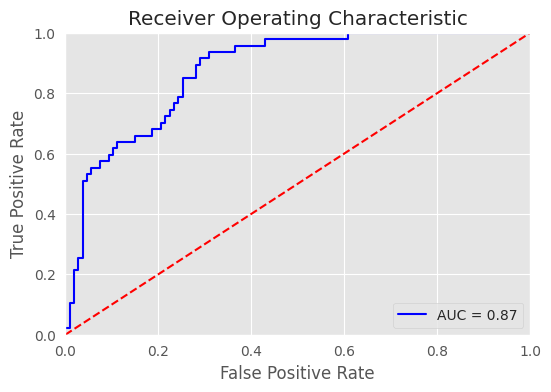

In [31]:
probs = grid_svc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()